### Time Series Analysis with Pandas
In this project, time series data analysis with pandas is presented. The air pollution dataset of Bangkok is used for this purpose. This dataset consists of hourly  update of 12 attributes between Jan 1st, 2018 to Dec 31st, 2022. The attributes consists of  Datetime,  pollution(pm2.5) dew point(Dewp), temperature(temp),  Pressure (PRES), wind direction(cbwd),  wind speed(lws), snow(ls) and rain(lr). Dataset is taken from  <a href='https://github.com/Tenyyy/DES432_AIR'>here</a>.<br>

In [25]:
#import necesary libraries
import pandas as pd
import numpy as np
%matplotlib inline

In [58]:
#load dataset
url = 'https://raw.githubusercontent.com/Tenyyy/DES432_AIR/main/airpollution.csv'
data = pd.read_csv(url)
data.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2018,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2018,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2018,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2018,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2018,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0


###  Data manipulation
In this section, the index are changed into datatime index, renames the columns, check the latest value, etc are perfomed in the dataset.

In [30]:
# make datatime as index 
data.set_index( pd.to_datetime(data[['year','month', 'day', 'hour']]), inplace= True)
data.index.name = 'Date_time' # index name
data.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
Date_time,,,,,,,,,,,,,
2018-01-01 00:00:00,1,2018,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
2018-01-01 01:00:00,2,2018,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2018-01-01 02:00:00,3,2018,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
2018-01-01 03:00:00,4,2018,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
2018-01-01 04:00:00,5,2018,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0


In [31]:
# lets drop column 'No', 'year', 'month', 'day' ,'hour'
data.drop(columns=['No', 'year', 'month', 'day' ,'hour'], inplace=True)
data.head()

,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
Date_time,,,,,,,,
2018-01-01 00:00:00,NaN,-21,-11.0,1021.0,NW,1.79,0,0
2018-01-01 01:00:00,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2018-01-01 02:00:00,NaN,-21,-11.0,1019.0,NW,6.71,0,0
2018-01-01 03:00:00,NaN,-21,-14.0,1019.0,NW,9.84,0,0
2018-01-01 04:00:00,NaN,-20,-12.0,1018.0,NW,12.97,0,0


In [32]:
# rename the columns name
#data.columns = ['pollution', 'dewp', 'temp', 'press', 'wnd_dir', 'wnd_spd', 'snow', 'snow']
data.rename(columns={'pm2.5':'pollution',
                     'DEWP':'dewp',
                     'TEMP':'temp',
                     'PRES': 'press',
                     'cbwd': 'wnd_dir',
                     'Iws' :'wnd_spd',
                     'Is': 'snow',
                     'Ir' : 'rain'
                              
                    }, 
            
                 inplace=True)
data.head()

,pollution,dewp,temp,press,wnd_dir,wnd_spd,snow,rain
Date_time,,,,,,,,
2018-01-01 00:00:00,NaN,-21,-11.0,1021.0,NW,1.79,0,0
2018-01-01 01:00:00,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2018-01-01 02:00:00,NaN,-21,-11.0,1019.0,NW,6.71,0,0
2018-01-01 03:00:00,NaN,-21,-14.0,1019.0,NW,9.84,0,0
2018-01-01 04:00:00,NaN,-20,-12.0,1018.0,NW,12.97,0,0


#### lets change the NaN into 0 and  drop the first 24 rows since  in pollution column since it has 24 rows with NaN (all 24 row will be zero). Analyis will be conducted mostly in this column only.

In [33]:
data.fillna(0, inplace=True)
data = data[24:] # remove  first 24 rows
data.head()

,pollution,dewp,temp,press,wnd_dir,wnd_spd,snow,rain
Date_time,,,,,,,,
2018-01-02 00:00:00,129.0,-16,-4.0,1020.0,SE,1.79,0,0
2018-01-02 01:00:00,148.0,-15,-4.0,1020.0,SE,2.68,0,0
2018-01-02 02:00:00,159.0,-11,-5.0,1021.0,SE,3.57,0,0
2018-01-02 03:00:00,181.0,-7,-5.0,1022.0,SE,5.36,1,0
2018-01-02 04:00:00,138.0,-7,-5.0,1022.0,SE,6.25,2,0


In [34]:
# check null
data.isnull().sum()

pollution    0
dewp         0
temp         0
press        0
wnd_dir      0
wnd_spd      0
snow         0
rain         0
dtype: int64

In [35]:
#check data types
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 43800 entries, 2018-01-02 00:00:00 to 2022-12-31 23:00:00
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pollution  43800 non-null  float64
 1   dewp       43800 non-null  int64  
 2   temp       43800 non-null  float64
 3   press      43800 non-null  float64
 4   wnd_dir    43800 non-null  object 
 5   wnd_spd    43800 non-null  float64
 6   snow       43800 non-null  int64  
 7   rain       43800 non-null  int64  
dtypes: float64(4), int64(3), object(1)
memory usage: 3.0+ MB


In [36]:
# check Latest Date Value
data['pollution'].index.max()

Timestamp('2022-12-31 23:00:00')

In [37]:
# check Latest Date Index Location
data.index.argmax()

43799

In [38]:
# check Earliest Date Value
data.index.min()

Timestamp('2018-01-02 00:00:00')

In [39]:
# check Earliest Date Value
data.index.argmin()

0

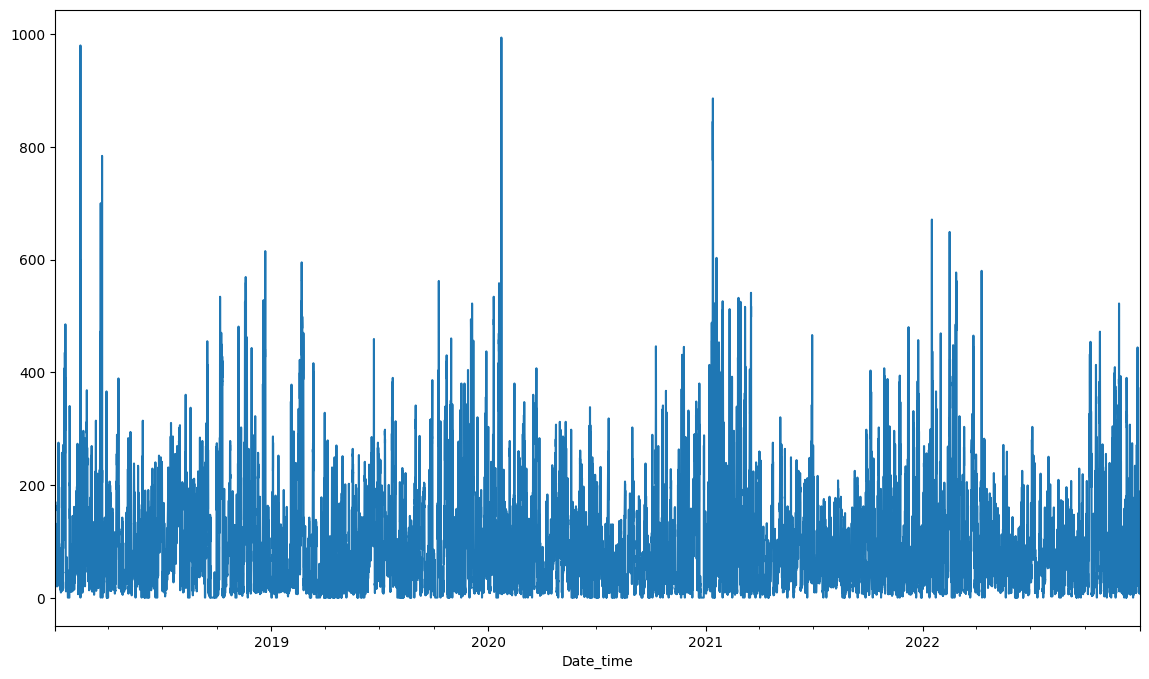

In [40]:
# plot air pollution
data['pollution'].plot(figsize=(14,8));

### lets do some analysis in the dataset.

##### Which day was the worst day(high air pollution) over this period?

In [41]:
#data[data['pollution']==data['pollution'].max()]
data['pollution'].idxmax()

Timestamp('2020-01-23 01:00:00')

##### Find the max air pollution days in each year and plot graph with values?

In [42]:
#stores pollution value 
list_worst_days = [] 

#separates data based on year
data_2018 = data.loc['2018-01-01': '2018-01-31']
print('Higest air pollution day in  year 2018 is ', data_2018['pollution'].idxmax())
list_worst_days.append(data_2019['pollution'].max())

data_2019 = data.loc['2019-01-01': '2019-01-31']
print('Higest air pollution day in  year 2019 is ', data_2019['pollution'].idxmax())
list_worst_days.append(data_2019['pollution'].max())

data_2020 = data.loc['2020-01-01': '2020-01-31']
print('Higest air pollution day in  year 2020 is ', data_2020['pollution'].idxmax())
list_worst_days.append(data_2020['pollution'].max())

data_2021 = data.loc['2021-01-01': '2021-01-31']
print('Higest air pollution day in  year 2021 is ', data_2021['pollution'].idxmax())
list_worst_days.append(data_2021['pollution'].max())

data_2022 = data.loc['2022-01-01': '2022-01-31']
print('Higest air pollution day in  year 2022 is ', data_2022['pollution'].idxmax())
list_worst_days.append(data_2022['pollution'].max())



Higest air pollution day in  year 2018 is  2018-01-19 18:00:00
Higest air pollution day in  year 2019 is  2019-01-03 20:00:00
Higest air pollution day in  year 2020 is  2020-01-23 01:00:00
Higest air pollution day in  year 2021 is  2021-01-12 20:00:00
Higest air pollution day in  year 2022 is  2022-01-16 04:00:00


Finding: it seems that every January month the days are wrost

#### lets plot these values how is the trend; is it increasing or decreasing?

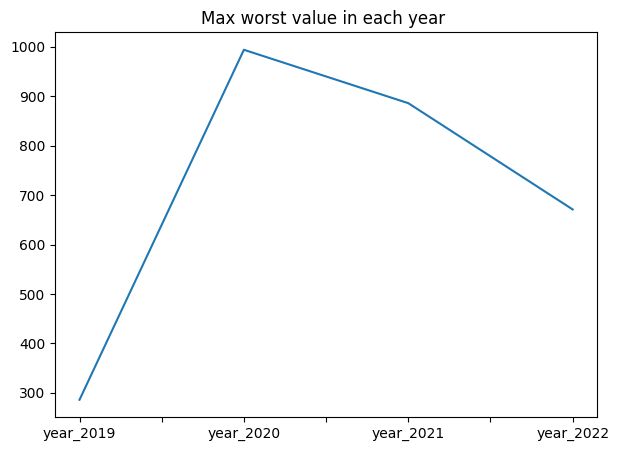

In [43]:
#create series of worst values
series_worst = pd.Series(list_worst_days, index =['year_2019', 'year_2019', 'year_2020', 'year_2021' , 'year_2022'])
series_worst.plot(figsize=(7,5), title ='Max worst value in each year ');


It clearly shows that  in the year 2020 was the worst(with high peak) and keep on decreasing. 

### Time Resampling
In this section, how to resample the time series data is introduced. we can do resampling based on day,  month, year etc.

In [44]:
# Year Means
data.resample(rule='A').mean()

<ipython-input-44-54b8f4ff61ee>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.resample(rule='A').mean()


,pollution,dewp,temp,press,wnd_spd,snow,rain
Date_time,,,,,,,
2018-12-31,96.363782,1.648352,11.682921,1016.328125,28.431335,0.071429,0.268658
2019-12-31,90.838014,2.134589,12.565297,1017.327283,26.232765,0.051712,0.140525
2020-12-31,85.505237,1.976890,11.967441,1016.144467,24.143322,0.071835,0.269353
2021-12-31,100.760274,1.329680,12.399201,1015.799600,21.057219,0.034932,0.160959
2022-12-31,96.630023,2.052169,13.679566,1016.637557,19.618643,0.033904,0.135616


### Plot year mean

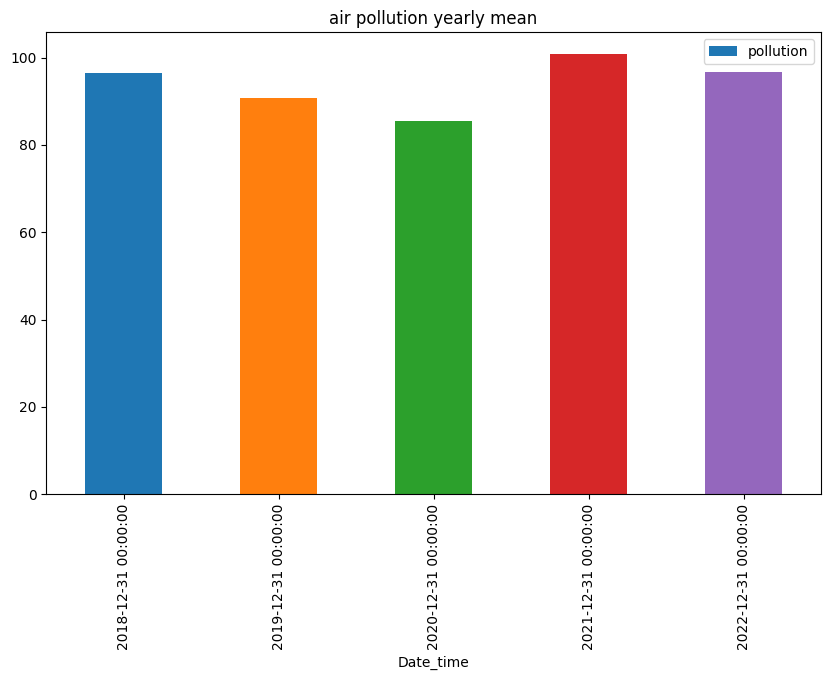

In [45]:
#yearly mean 
data['pollution'].resample('A').mean().plot.bar(title='air pollution yearly mean',
                                                legend= True, 
                                                color=['C0', 'C1', 'C2', 'C3', 'C4'],
                                                figsize=(10,6));


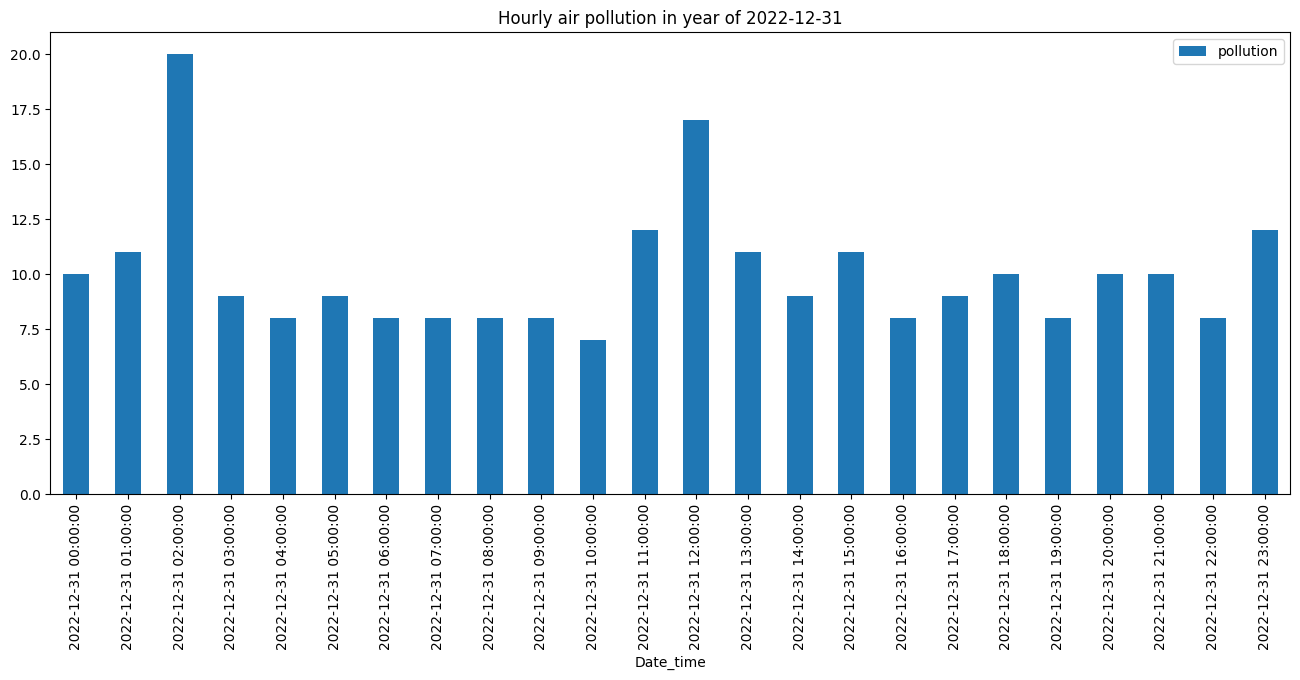

In [46]:
# plot air pollution of 24 hours in the year 2022-12-31.
title = 'Hourly air pollution in year of 2022-12-31'
data.loc['2022-12-31': '2022-12-31'][['pollution']].plot.bar(figsize=(16,6), title=title,color='#1f77b4');


### Time Shifting

### .shift() forward
This method shifts the entire date index a given number of rows, without regard for time periods (hours, date, months & years).It returns a modified copy of the original DataFrame. And, the last given number of rows are removed.

In [47]:
data.shift(2).head()

,pollution,dewp,temp,press,wnd_dir,wnd_spd,snow,rain
Date_time,,,,,,,,
2018-01-02 00:00:00,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN
2018-01-02 01:00:00,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN
2018-01-02 02:00:00,129.0,-16.0,-4.0,1020.0,SE,1.79,0.0,0.0
2018-01-02 03:00:00,148.0,-15.0,-4.0,1020.0,SE,2.68,0.0,0.0
2018-01-02 04:00:00,159.0,-11.0,-5.0,1021.0,SE,3.57,0.0,0.0


In [48]:
# NOTE:  last 2 piece of data that no longer has an index!
data.shift(2).tail()

,pollution,dewp,temp,press,wnd_dir,wnd_spd,snow,rain
Date_time,,,,,,,,
2022-12-31 19:00:00,9.0,-22.0,-1.0,1033.0,NW,221.24,0.0,0.0
2022-12-31 20:00:00,10.0,-22.0,-2.0,1033.0,NW,226.16,0.0,0.0
2022-12-31 21:00:00,8.0,-23.0,-2.0,1034.0,NW,231.97,0.0,0.0
2022-12-31 22:00:00,10.0,-22.0,-3.0,1034.0,NW,237.78,0.0,0.0
2022-12-31 23:00:00,10.0,-22.0,-3.0,1034.0,NW,242.70,0.0,0.0


### .shift() backwards

In [49]:
data.shift(-1).head()

,pollution,dewp,temp,press,wnd_dir,wnd_spd,snow,rain
Date_time,,,,,,,,
2018-01-02 00:00:00,148.0,-15.0,-4.0,1020.0,SE,2.68,0.0,0.0
2018-01-02 01:00:00,159.0,-11.0,-5.0,1021.0,SE,3.57,0.0,0.0
2018-01-02 02:00:00,181.0,-7.0,-5.0,1022.0,SE,5.36,1.0,0.0
2018-01-02 03:00:00,138.0,-7.0,-5.0,1022.0,SE,6.25,2.0,0.0
2018-01-02 04:00:00,109.0,-7.0,-6.0,1022.0,SE,7.14,3.0,0.0


In [50]:
data.shift(-1).tail()

,pollution,dewp,temp,press,wnd_dir,wnd_spd,snow,rain
Date_time,,,,,,,,
2022-12-31 19:00:00,10.0,-22.0,-3.0,1034.0,NW,237.78,0.0,0.0
2022-12-31 20:00:00,10.0,-22.0,-3.0,1034.0,NW,242.70,0.0,0.0
2022-12-31 21:00:00,8.0,-22.0,-4.0,1034.0,NW,246.72,0.0,0.0
2022-12-31 22:00:00,12.0,-21.0,-3.0,1034.0,NW,249.85,0.0,0.0
2022-12-31 23:00:00,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN


### Shifting based on Time Series Frequency Code

shift(forward or backward) the rows in dataframe based on the frequency code, for example, hour, day, month, year, etc.


In [51]:
# Shift everything forward one hour
data.shift(periods=2, freq='H').tail()

,pollution,dewp,temp,press,wnd_dir,wnd_spd,snow,rain
Date_time,,,,,,,,
2022-12-31 21:00:00,8.0,-23,-2.0,1034.0,NW,231.97,0,0
2022-12-31 22:00:00,10.0,-22,-3.0,1034.0,NW,237.78,0,0
2022-12-31 23:00:00,10.0,-22,-3.0,1034.0,NW,242.70,0,0
2023-01-01 00:00:00,8.0,-22,-4.0,1034.0,NW,246.72,0,0
2023-01-01 01:00:00,12.0,-21,-3.0,1034.0,NW,249.85,0,0


### Rolling and Expanding
In the section, rolling and expandaing feature of pandas is introduced. 
<b>In the rolling </b>,  the data is divided into certain rows(window size) and apply the desire function to perfom the desire task, for example  window size = 2 means it calculates the function of just two previous rows, but
<b>In the Expanding </b>, it takes account every rows from start to the each point in time series, for example min_period = 3  means it takes all previous rows to the current row and apply the function.


In [52]:
# 24 hour rolling mean
data.rolling(window= 24).mean().head(25)


<ipython-input-52-e6d8925017fe>:2: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['wnd_dir'], dtype='object')
  data.rolling(window= 24).mean().head(25)


,pollution,dewp,temp,press,wnd_spd,snow,rain
Date_time,,,,,,,
2018-01-02 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-02 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-02 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-02 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-02 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-02 05:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-02 06:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-02 07:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-02 08:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


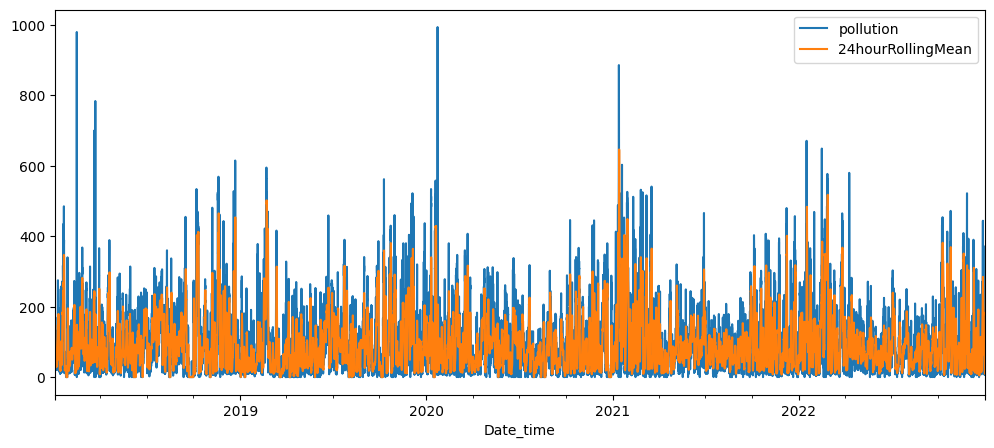

In [53]:
#plot 24 hour rolling mean  with original data
data['24hourRollingMean'] = data['pollution'].rolling(window=24).mean()
data[['pollution','24hourRollingMean']].plot(figsize=(12,5)).autoscale(axis='x',tight=True);

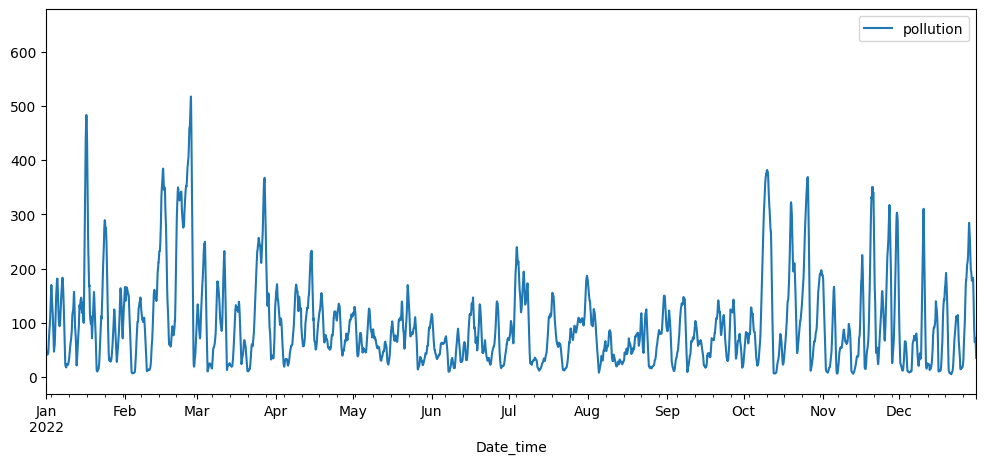

In [54]:
# rolling mean of 24 hours in year 2022
data[['pollution']].rolling(window = 24).mean().plot(figsize=(12,5), xlim=['2022-01-01','2022-12-31']);


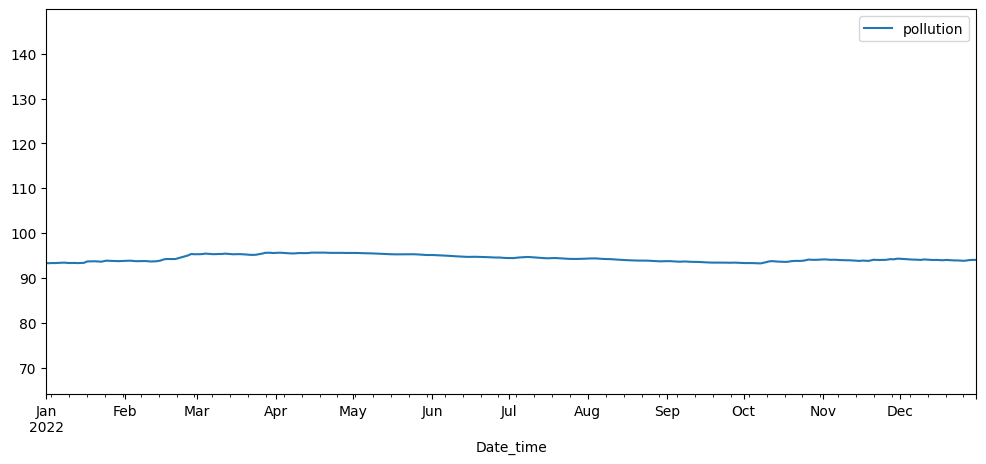

In [55]:
#24 hours mean in year 2022 using expanding
#data[['pollution']].expanding(min_periods=24).mean().head(10)
data[['pollution']].expanding(min_periods=24).mean().plot(figsize=(12,5), xlim=['2022-01-01','2022-12-31']);

### Create a BoxPlot that groups by the Month field for year 2022

In [56]:
#creates month column
data['Month']=data.index.month
data['Month']=data.index.strftime('%B')
data.head()

,pollution,dewp,temp,press,wnd_dir,wnd_spd,snow,rain,24hourRollingMean,Month
Date_time,,,,,,,,,,
2018-01-02 00:00:00,129.0,-16,-4.0,1020.0,SE,1.79,0,0,NaN,January
2018-01-02 01:00:00,148.0,-15,-4.0,1020.0,SE,2.68,0,0,NaN,January
2018-01-02 02:00:00,159.0,-11,-5.0,1021.0,SE,3.57,0,0,NaN,January
2018-01-02 03:00:00,181.0,-7,-5.0,1022.0,SE,5.36,1,0,NaN,January
2018-01-02 04:00:00,138.0,-7,-5.0,1022.0,SE,6.25,2,0,NaN,January


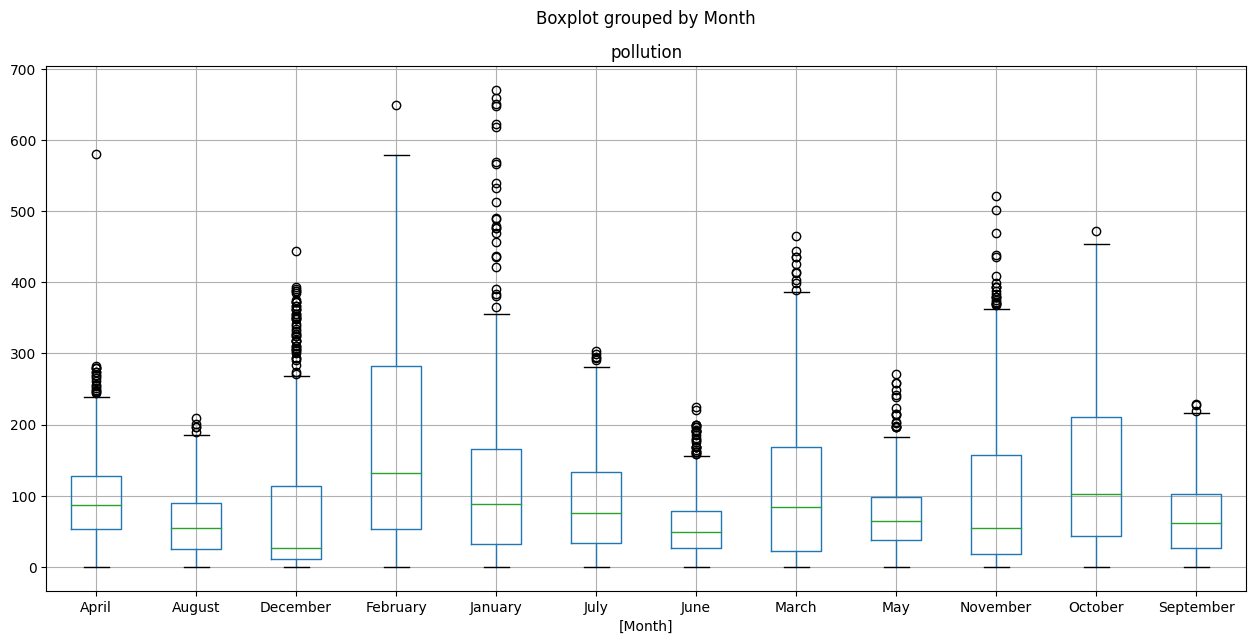

In [57]:
# box plot group by month in year 2022
data.loc['2022-01-01':][['pollution','Month']].boxplot(by='Month', figsize=(15,7));